## Лабораторная работа 2 - Линейная и полиномиальная регрессия.

Одна из множества задач, которой занимается современная физика это поиск материала для изготовления сверхпроводника, работающего при комнатной температуре. Кроме теоретических методов есть и подход со стороны статистики, который подразумевает анализ базы данных материалов для нахождения зависимости критической температуры от других физических характеристик. Именно этим Вы и займетесь.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

В файле **data.csv** содержится весь датасет.

In [23]:
data = pd.read_csv('data.csv')
data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31


Итого имеем 21 тысячу строк и 169 колонок, из которых первые 167 - признаки, колонка **critical_temp** содержит величину, которую надо предсказать. Колонка **material** - содержит химическую формулу материала, ее можно отбросить.

Выполним предобработку данных и разобъем на тренировочную и тестовую выборки:

In [38]:
# X - last two columns cut.
# Y - pre last column.
x, y = data.values[:, :-2].astype(np.float32), data.values[:, -2:-1].astype(np.float32)

np.random.seed(1337)
is_train = np.random.uniform(size=(x.shape[0],)) < 0.95

x_train, y_train = x[is_train], y[is_train]
x_test, y_test = x[~is_train], y[~is_train]

print(f'Train samples: {len(x_train)}')
print(f'Test samples: {len(x_test)}')

Train samples: 20210
Test samples: 1053


Реализуйте методы с пометкой `#TODO` класса PolynomialRegression:

Метод `preprocess` должен выполнять следующее преобразование:
$$
\begin{array}{l}
X=\begin{bmatrix}
x_{i,j}
\end{bmatrix}_{m\times n}\\
preprocess( X) =\begin{bmatrix}
1 & x_{1,1} & \dotsc  & x_{1,1} & x^{2}_{1,1} & \dotsc  & x^{2}_{1,1} & \dotsc  & x^{p}_{1,1} & \dotsc  & x^{p}_{1,1}\\
1 & x_{2,1} & \dotsc  & x_{2,n} & x^{2}_{2,1} & \dotsc  & x^{2}_{2,n} & \dotsc  & x^{p}_{2,1} & \dotsc  & x^{p}_{2,n}\\
\vdots  &  &  &  &  &  &  &  &  &  & \\
1 & x_{m,1} & \dotsc  & x_{m,n} & x^{2}_{m,1} & \dotsc  & x^{2}_{m,n} & \dotsc  & x^{p}_{m,1} & \dotsc  & x^{p}_{m,n}
\end{bmatrix}_{m,N}
\end{array}
$$где p - степень полинома (`self.poly_deg` в коде).
Таким образом, preprocess добавляет полиномиальные признаки к $X$.

Метод `J` должен вычислять оценочную функцию регрессии:
$$
J( \theta ) =MSE( Y,\ h_{\theta }( X)) +\alpha _{1}\sum ^{N}_{i=1}\sum ^{k}_{j=1} |\hat{\theta }_{i,j} |+\alpha _{2}\sum ^{N}_{i=1}\sum ^{k}_{j=1}\hat{\theta }^{2}_{i,j}
$$
Метод `grad` должен вычислять градиент $\frac{\partial J}{\partial \theta }$:
$$
{\displaystyle \frac{\partial J}{\partial \theta }} =-{\displaystyle \frac{2}{m}} X^{T} (Y-X\theta )+\begin{bmatrix}
0 &  &  & \\
 & 1 &  & \\
 &  & \ddots  & \\
 &  &  & 1
\end{bmatrix} \times ( \alpha _{1} sign(\theta )+2\alpha _{2} \theta )
$$
Метод `moments` должен возвращать вектор-строки $\mu,\sigma$ для среднего и стандартного отклонения каждой колонки. Помните, что колонку с единицами не нужно нормализировать, так что соответствующие среднее и стандартное отколонение для нее укажите равными 0 и 1 соответственно. Можно использовать функции 
[np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) и [np.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Метод `normalize` должен выполнять нормализацию $X$ на основе статистик $\mu,\sigma$, что вернул метод **moments**. Для того чтобы избежать деления на 0, можете к $\sigma$ прибавить маленькую величину, например $10^{-8}$.

Метод `get_batch` должен возвращать матрицы $X_b, Y_b$ из произвольно выбранных $b$ элементов выборки ($b$ в коде - `self.batch_size`).

Метод `fit` выполняет оптимизацию $J(\theta)$. Для лучшей сходимости реализуйте алгоритм оптимизации **Momentum**:
$$
\begin{array}{l}
v_t = \gamma v_{t-1} + \alpha\nabla J(\theta_{t-1})\\
\theta_t = \theta_{t-1} - v_t
\end{array}
$$
где $\gamma$ установите равным $0.9$ (можете поэкспериментировать с другими величиными), $v_1=[0]_{N,k}$.

In [39]:
class PolynomialRegression:
    def __init__(
        self,
        alpha1,
        alpha2,
        poly_deg,
        learning_rate,
        batch_size,
        train_steps
    ):
        self.alpha1 = alpha1
        self.alpha2 = alpha2
        self.poly_deg = poly_deg
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.train_steps = train_steps
    
    def preprocess(self, x):
        # Create first one column.
        ones = [np.ones(shape=(x.shape[0], 1))]
        # Polynomic scale.
        powers = [x ** i for i in range(1, self.poly_deg + 1)]
        # Unite into one.
        result = np.concatenate(ones + powers, axis=1)
        return result
    
    def normalize(self, x):
        return (x - self.mu) / (self.sigma + 1e-8)
    
    def moments(self, x):
        # Arttimetic average (a + b + ... + z) / n.
        mu = np.mean(x, axis=0)
        # Standart deviation.
        sigma = np.std(x, axis=0)
        mu[0] = 0
        sigma[0] = 1
        return mu, sigma
    
    def J(self, x, y, theta):
        # Theta is not multiply with first (ones) column.
        circumcized_theta = theta[1::]
        # Mean squared error.
        mse = ((y - np.dot(x, theta)) ** 2).mean(axis=None)
        # Module sum of theta (alpha1).
        l1 = self.alpha1 * np.sum(np.abs(circumcized_theta), axis=None)
        # Quadro sum of theta (alpha2).
        l2 = self.alpha2 * np.sum(circumcized_theta ** 2, axis=None)
        return mse + l1 + l2
    
    def grad(self, x, y, theta):
        # Create ones matrix.
        diag = np.eye(x.shape[1], x.shape[1])
        # Init first element as 0.
        diag[0][0] = 0
        # Left assign.
        l1l2 = self.alpha1 * np.sign(theta) + 2 * self.alpha2 * theta
        return (-2/x.shape[0]) * x.T @ (y - (x @ theta)) + (diag @ l1l2)
    
    def get_batch(self, x, y):
        # Return random values.
        i = np.random.default_rng().choice(x.shape[0], self.batch_size, replace=False)
        return x[i], y[i]
    
    def fit(self, x, y):
        ## Trasform source data to polynom regression.
        x = self.preprocess(x)
        (m, N), (_, k) = x.shape, y.shape
        
        # Calculate mu and standart deviation.
        self.mu, self.sigma = self.moments(x)
        # Normalize using average values.
        x = self.normalize(x)
        
        try:
            assert np.allclose(x[:, 1:].mean(axis=0), 0, atol=1e-3)
            assert np.all((np.abs(x[:, 1:].std(axis=0)) < 1e-2) | (np.abs(x[:, 1:].std(axis=0) - 1) < 1e-2))
        except AssertionError as e:
            print('Something wrong with normalization')
            raise e
        # Random x & y.
        x_batch, y_batch = self.get_batch(x, y)
        try:
            assert x_batch.shape[0] == self.batch_size
            assert y_batch.shape[0] == self.batch_size
        except AssertionError as e:
            print('Something wrong with get_batch')
            raise e
        
        theta = np.zeros(shape=(N, k))
        v_1 = np.zeros(shape=(N, k))
        v_t = v_1
        for step in range(self.train_steps):
            x_batch, y_batch = self.get_batch(x, y)
            theta_grad = self.grad(x_batch, y_batch, theta)

            v_t = 0.9 * v_t + self.learning_rate * theta_grad
            theta = theta - v_t
            
        self.theta = theta
        
        return self

    def predict(self, x):
        x = self.preprocess(x)
        x = self.normalize(x)
        return x @ self.theta
    
    def score(self, x, y):
        y_pred = self.predict(x)
        return np.abs(y - y_pred).mean()

In [41]:
reg = PolynomialRegression(0, 0, 1, 1e-3, 1024, 1000).fit(x_train, y_train)
print(f'Test MAE: {reg.score(x_test, y_test)}')

Test MAE: 12.593122309572655


Полученный MAE на тестовой выборке должен быть приблизительно равен $12.5$.

Выполните поиск оптимальных параметров регуляризации $\alpha_1,\alpha_2$ по отдельности (то есть устанавливаете один параметр равным нулю и ищете второй, потом наоборот) и старшей степени полиномиальной регрессии (`poly_deg`). Обратите внимание, что поиск параметра регуляризации следует искать на логарифмической шкале. То есть, например, список кандидатов может быть задан как: `10 ** np.linspace(-5, -1, 5)`, что даст вам величины $10^{-5},10^{-4},10^{-3},10^{-2},10^{-1}$.
При надобности, можете отрегулировать оптимальный `batch_size`, `learning_rate`, `training_steps`.

Результаты представьте в виде графиков по примеру ниже.

Дополнительные баллы будут начислены за выполнение поиска оптимальных параметров $\alpha_1,\alpha_2$ вместе. В таком случае результаты представьте при помощи [plt.matshow](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.matshow.html).

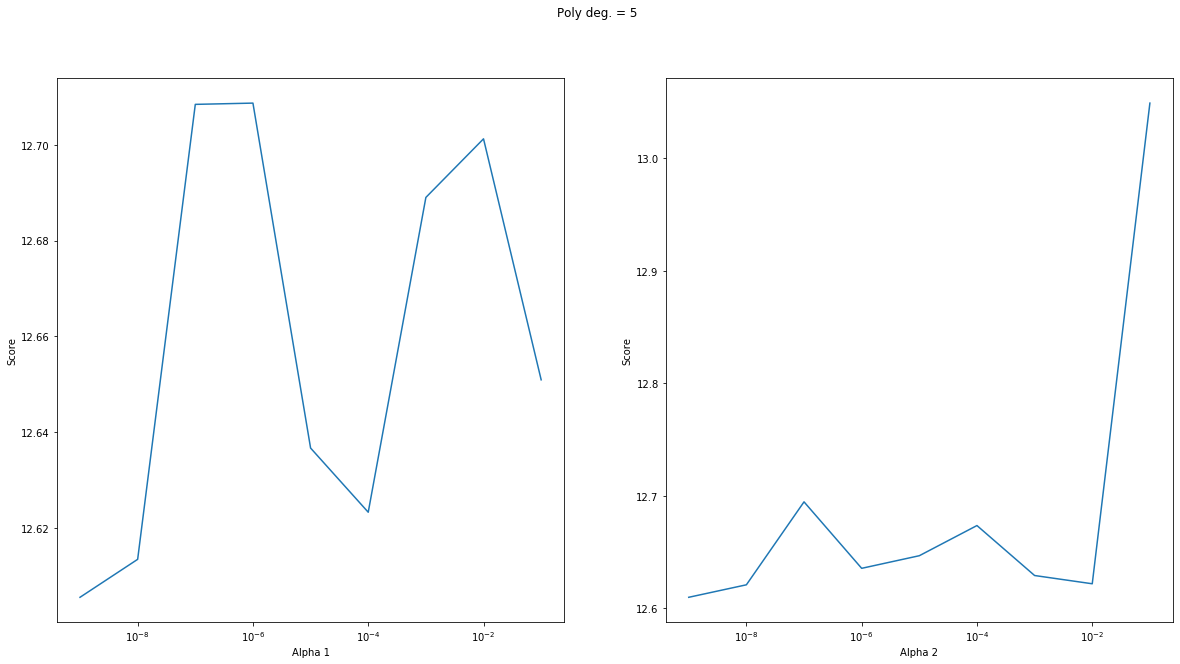

In [57]:
a1 = 10 ** np.linspace(-9, -1, 9)
a2 = 10 ** np.linspace(-9, -1, 9)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
fig.suptitle('Poly deg. = 5')
ax1.set_xlabel('Alpha 1')
ax1.set_ylabel('Score')
ax1.set_xscale('log')
ax1.plot([a1i for a1i in a1], [PolynomialRegression(a1i, 0, 1, 1e-3, 1024, 1000).fit(x_train, y_train).score(x_test, y_test) for a1i in a1])
ax2.set_xlabel('Alpha 2')
ax2.set_ylabel('Score')
ax2.set_xscale('log')
ax2.plot([a2i for a2i in a2], [PolynomialRegression(0, a2i, 1, 1e-3, 1024, 1000).fit(x_train, y_train).score(x_test, y_test) for a2i in a2])
plt.show()

Визуализируйте зависимость предсказанной критической температуры от истинной для лучшей модели:

Test MAE: 11.26531342526687


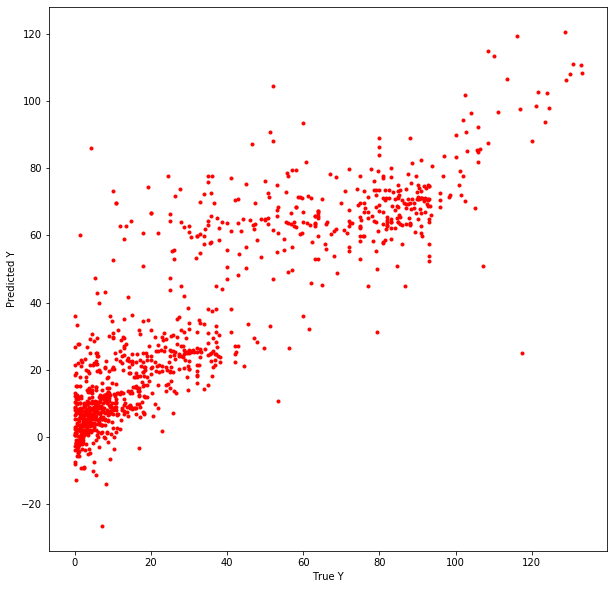

In [59]:
reg = PolynomialRegression(1e-5, 1e-5, 5, 1e-3, 1024, 1000).fit(x_train, y_train)
y_test_pred = reg.predict(x_test)
print(f'Test MAE: {reg.score(x_test, y_test)}')

plt.figure(figsize=(10, 10))
plt.scatter(y_test[:, 0], y_test_pred[:, 0], marker='.', c='r')
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.show()